In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2020-6-04 20:12:13
MODIFIED: 2021-11-01 01:48:45
"""

# -*- coding:utf-8 -*-
import cv2
import time

from PIL import Image, ImageDraw
from acl_model import Model

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [40]:
device_id = 0
model_path = "model/yolov3_bs1_aipp.om"
# model_path = "model/yolov5s_aipp.om"

In [86]:
# model = Model(device_id, model_path, model_type="yolov5")
model = Model(device_id, model_path, model_type="yolov3")

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 416, 416, 3]}, 0)
model input datatype 4
model output size 3
output  0
model output dims ({'name': 'Transpose_274:0', 'dimCount': 5, 'dims': [1, 3, 13, 13, 85]}, 0)
model output datatype 1
output  1
model output dims ({'name': 'Transpose_258:0', 'dimCount': 5, 'dims': [1, 3, 26, 26, 85]}, 0)
model output datatype 1
output  2
model output dims ({'name': 'Transpose_242:0', 'dimCount': 5, 'dims': [1, 3, 52, 52, 85]}, 0)
model output datatype 1
[Model] class Model init resource stage success
[Model] class Model release source success
[ACL] class Sample release source success


In [87]:
img_path = "data/dog.jpg"
img_org_bgr = cv2.imread(img_path)

In [88]:
%timeit -n 10 -r 3
bboxes = model.run1(img_org_bgr)

[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
inference takes 0.011590003967285156
moving data takes 0.0012497901916503906
detect takes 0.017928361892700195
nms takes 0.0013763904571533203
the rest takes 0.0003314018249511719


In [89]:
img = Image.open(img_path)

In [90]:
img1 = ImageDraw.Draw(img)
for bbox in bboxes:
    img1.rectangle(list(bbox[:4]), outline ="red", width=2)
    print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])

[132.0, 226.0, 313.0, 540.0] 0.8681744 16 dog
[124.0, 128.0, 566.0, 412.0] 0.853447 1 bicycle
[469.0, 78.0, 694.0, 172.0] 0.60030746 7 truck


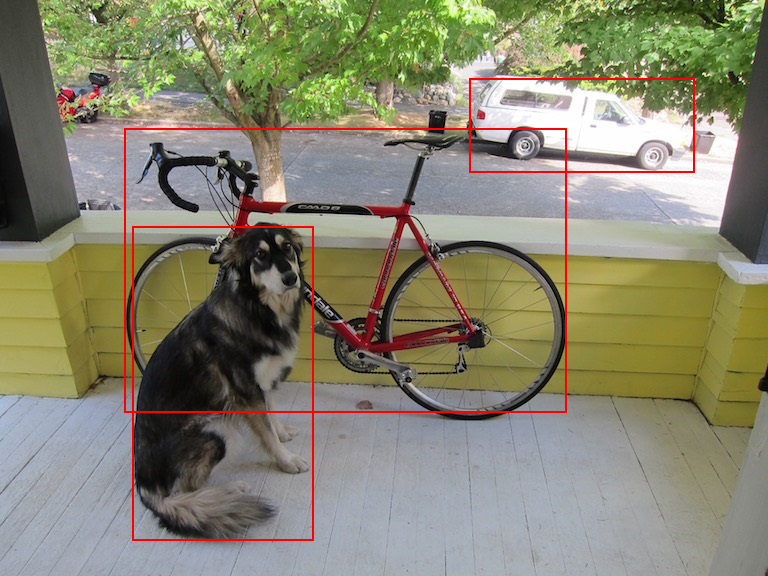

In [91]:
img